# TP boosting
## dataset: MNIST

In [1]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("nb of train samples",len(y_train))

nb of train samples 60000


In [2]:
#quelques imports pour la suite
import numpy as np
from sklearn.utils import shuffle

We choose 2 classes only for the binary classification: '4' and '8'. You can make another choice.

In [17]:
# class of '4'
x_train4 = x_train[y_train==4,:]
# class of '8'
x_train8 = x_train[y_train==8,:]

# together
x_trainBinaire = np.append(x_train4,x_train8,axis=0)
# positive class: '8' ; negative class: '4' 
y_trainBinaire = np.append(np.full(len(x_train4),-1), np.full(len(x_train8),1))

print(x_trainBinaire.shape, y_trainBinaire.shape)

# shuffle together
(x_trainBinaire,y_trainBinaire) = shuffle(x_trainBinaire,y_trainBinaire,random_state=0)

(11693, 28, 28) (11693,)


## simple boosting on the data


In [4]:
n = x_trainBinaire.shape[0]
x_trainBinaire = x_trainBinaire.reshape(n,-1)
print(x_trainBinaire.shape)

(11693, 784)


In [5]:
from sklearn import ensemble
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle

In [6]:
## boosting (Adaboost)
# object boosting
myboosting = ensemble.AdaBoostClassifier(n_estimators=50, learning_rate=1, algorithm='SAMME.R')
# learning on the training dataset
myboosting.fit(x_trainBinaire,y_trainBinaire)
# prediction
y_predBinaire = myboosting.predict(x_trainBinaire)
print('confusion matrix on train data',confusion_matrix(y_trainBinaire,y_predBinaire))

confusion matrix on train data [[5809   33]
 [  49 5802]]


We printed the confusion matrix on train dataset. What is the influence of the varaible n_estimators ?

**Performance increases**.

It is possible to display nicely the confusion matrix. For that, read the documentation: https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html.

Now compute the confusion matrix on the test dataset

In [7]:
# pre-processing of test dataset (2 classes ....)

# class of '4'
x_test4 = x_test[y_test==4,:]
# class of '8'
x_test8 = x_test[y_test==8,:]

# together
x_testBinaire = np.append(x_test4,x_test8,axis=0)
# positive class: '8' ; negative class: '4' 
y_testBinaire = np.append(np.full(len(x_test4),-1), np.full(len(x_test8),1))

print(x_testBinaire.shape, y_testBinaire.shape)

# shuffle together
(x_testBinaire,y_testBinaire) = shuffle(x_testBinaire,y_testBinaire,random_state=0)

n = x_testBinaire.shape[0]
x_testBinaire = x_testBinaire.reshape(n,-1)
print(x_testBinaire.shape)

(1956, 28, 28) (1956,)
(1956, 784)


In [8]:
# confusion matrix computation and display

y_predBinaire = myboosting.predict(x_testBinaire)
print('confusion matrix on test data\n',confusion_matrix(y_testBinaire,y_predBinaire))

confusion matrix on test data
 [[974   8]
 [ 13 961]]


## boosting on the 10 classes from MNIST:


In [9]:
## boosting (Adaboost)

n = x_train.shape[0]
x_train_reshaped = x_train.reshape(n,-1)
(x_train_reshaped,y_train) = shuffle(x_train_reshaped,y_train,random_state=0)

n = x_test.shape[0]
x_test_reshaped = x_test.reshape(n,-1)
(x_test_reshaped,y_test) = shuffle(x_test_reshaped,y_test,random_state=0)

# object boosting
myboosting = ensemble.AdaBoostClassifier(n_estimators=100, learning_rate=1, algorithm='SAMME.R')
# learning on the training dataset
myboosting.fit(x_train_reshaped,y_train)
# prediction

y_pred = myboosting.predict(x_train_reshaped)
print('confusion matrix on train data:\n\n',confusion_matrix(y_train, y_pred))

y_pred = myboosting.predict(x_test_reshaped)
print('\nconfusion matrix on train data:\n\n',confusion_matrix(y_test, y_pred))

confusion matrix on train data:

 [[5350    1   33   10    7  258  203   10   35   16]
 [   0 6356   48   21    8   36   30  157   80    6]
 [ 211  306 3288  139  121   91 1328  136  288   50]
 [ 313  232   96 3563   24  818  174  117  637  157]
 [  52   34  123   41 4563   55   95  341  158  380]
 [ 268  111   42  479   52 3469  374   52  433  141]
 [  89   57  269   14  213   77 5143    7   48    1]
 [  91   87  100   47  126   25    0 4486   66 1237]
 [ 119  442  124  380   86  204  183   78 4124  111]
 [  86   76  100  102  855   80    5  718  327 3600]]

confusion matrix on train data:

 [[ 884    0    7    2    1   43   37    2    2    2]
 [   0 1076    5    5    3    5    2   22   17    0]
 [  35   59  564   25   16   14  230   27   56    6]
 [  52   34   17  590    0  140   23   18  114   22]
 [   4    0   16   10  774    9    7   56   31   75]
 [  44   23    4   75   15  558   68   12   74   19]
 [  16    3   44    3   37   29  816    2    8    0]
 [  12   18   24   10   14   

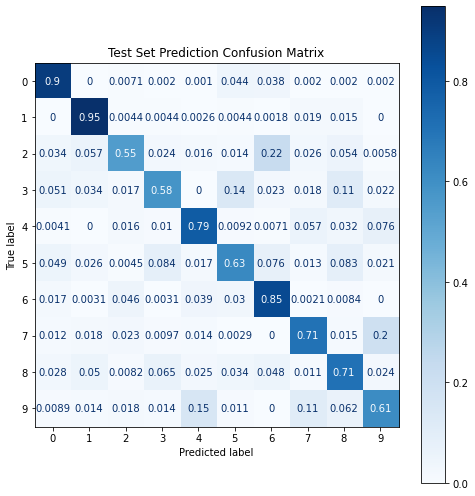

In [10]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(7, 7))
plot_confusion_matrix(myboosting, x_test_reshaped, y_test,
                      cmap=plt.cm.Blues,
                      normalize='true', 
                      ax=ax)
plt.title("Test Set Prediction Confusion Matrix")
plt.tight_layout()
plt.grid(False)
plt.show()

## binary boosting using Haar filters
The first step is the preparation of the data.

### Haar filters

In [51]:
from skimage import feature
from skimage import transform

In [52]:
# class of '4'
x_train4 = x_train[y_train==4,:]
# class of '8'
x_train8 = x_train[y_train==8,:]

# together
x_trainBinaire = np.append(x_train4,x_train8,axis=0)
# positive class: '8' ; negative class: '4' 
y_trainBinaire = np.append(np.full(len(x_train4),-1), np.full(len(x_train8),1))

print(x_trainBinaire.shape, y_trainBinaire.shape)

# shuffle together
(x_trainBinaire,y_trainBinaire) = shuffle(x_trainBinaire,y_trainBinaire,random_state=0)

(11693, 28, 28) (11693,)


For Haar filters, it is possible to generate them from the library tools or to build them by hand.

In [53]:
# automatic generation from:
#       'type-2-x' and 'type-2-y'
# and images dimension: 28x28
feat_coord, feat_type = feature.haar_like_feature_coord(28, 28, ['type-2-x','type-2-y'])

How many filters ? And compared to pixels number ?

In [54]:
print(feat_coord, feat_type, sep="\n\n")

[list([[(0, 0), (0, 0)], [(0, 1), (0, 1)]])
 list([[(0, 0), (0, 1)], [(0, 2), (0, 3)]])
 list([[(0, 0), (0, 2)], [(0, 3), (0, 5)]]) ...
 list([[(26, 26), (26, 26)], [(27, 26), (27, 26)]])
 list([[(26, 26), (26, 27)], [(27, 26), (27, 27)]])
 list([[(26, 27), (26, 27)], [(27, 27), (27, 27)]])]

['type-2-x' 'type-2-x' 'type-2-x' ... 'type-2-y' 'type-2-y' 'type-2-y']


In [ ]:
# images transformation: we apply all filters
cpt=0

for image in x_trainBinaire:
    # integral image computation
    int_image = transform.integral_image(image)
#     print(int_image.shape)
    # Haar filters computation
    features = feature.haar_like_feature(int_image, 
                                         0, 0, 28, 28, 
                                         feature_type=feat_type,
                                         feature_coord=feat_coord)
    if cpt%1000 == 0:
        ftrain = [features]
    else:
        ftrain = np.append(ftrain,[features],axis=0)
    cpt += 1

Applying Haar filters can take some time. Don't hesitate to save the results.

In [ ]:
# code for saving and loading python object
import pickle
# save ftrain in the file 'features.bin'
with open('features.bin', 'wb') as output:
        pickle.dump(ftrain, output, pickle.HIGHEST_PROTOCOL)
# load ftrain from the saved file
with open('features.bin', 'rb') as output:
        ftrain = pickle.load(output)

## binary boosting with Haar filters
Compare the different options for the filters. Compare with the first boosting in this notebook. 

In [ ]:
ftrain.shape

In [46]:
n = x_trainBinaire.shape[0]
x_trainBinaire = x_trainBinaire.reshape(n,-1)
print(x_trainBinaire.shape)

(11693, 784)


In [47]:
## boosting (Adaboost)
# object boosting
myboosting = ensemble.AdaBoostClassifier(n_estimators=50, learning_rate=1, algorithm='SAMME.R')
# learning on the training dataset
myboosting.fit(x_trainBinaire,y_trainBinaire)
# prediction
y_predBinaire = myboosting.predict(x_trainBinaire)
print('confusion matrix on train data',confusion_matrix(y_trainBinaire,y_predBinaire))

confusion matrix on train data [[3300 2542]
 [2553 3298]]


## 10 classes boosting with Haar filters
Same questions